In [2]:
import os
import re
import nltk
import itertools
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
# Loading Data
data = pd.read_table('../data/IMDB_reviews.tsv')
data.head(10)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [8]:
# Counting unique words
reviews = data['review'].tolist()

words = list(map(lambda x: re.findall(r'\w+', x), reviews))
sentences = list(map(lambda x: ' '.join(x), words))
all_words = list(itertools.chain.from_iterable(map(lambda x: re.findall(r'\w+', x), reviews)))
unique_words = set(all_words)

print("All words = ", len(all_words))
print("Unique words = ", len(unique_words))

All words =  6056873
Unique words =  93929


In [10]:
reviews_array = np.array(sentences).reshape(25000, 1)
sentiment_array = data['sentiment'].as_matrix().reshape((25000, 1))

In [11]:
print("Reviews:",reviews_array.shape)
print("Sentiment:",sentiment_array.shape)

Reviews: (25000, 1)
Sentiment: (25000, 1)


In [6]:
dataset = np.hstack((sentiment_array, reviews_array))

In [7]:
print("Shape = ", dataset.shape)

Shape =  (25000, 2)


In [3]:
dataset = np.load('dataset.np.npy')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts
# max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
vectorizer = CountVectorizer(stop_words=stopwords.words(), max_df=0.5)

In [5]:
# Learn the vocabulary dictionary and return document-term matrix (DTM).
DTM = vectorizer.fit_transform(dataset.T[1].astype(np.unicode).reshape((25000,)).tolist())

In [6]:
print("Shape =", DTM.shape)

Shape = (25000, 74334)


In [7]:
# Co-occurency matrix
coOC = (DTM.T * DTM).astype(np.int32)
print("Shape =",coOC.shape)

Shape = (74334, 74334)


In [8]:
diag = coOC.diagonal()
coOC.setdiag(0)

In [9]:
from scipy.sparse.linalg import svds
u, s, v = svds(coOC.asfptype(), k=2)

In [10]:
top_words = np.argsort(diag)[-20:][::-1].tolist()

In [11]:
for i in top_words:
    print(vectorizer.get_feature_names()[i], " - ", diag[i])

like  -  52065
good  -  33725
story  -  27260
would  -  26758
even  -  25557
really  -  25106
time  -  25025
show  -  21849
bad  -  21654
see  -  21181
people  -  19847
well  -  19835
great  -  17778
first  -  17764
much  -  17326
get  -  16625
films  -  15157
movies  -  14954
character  -  14276
love  -  14019


In [17]:
import matplotlib.pyplot as plt

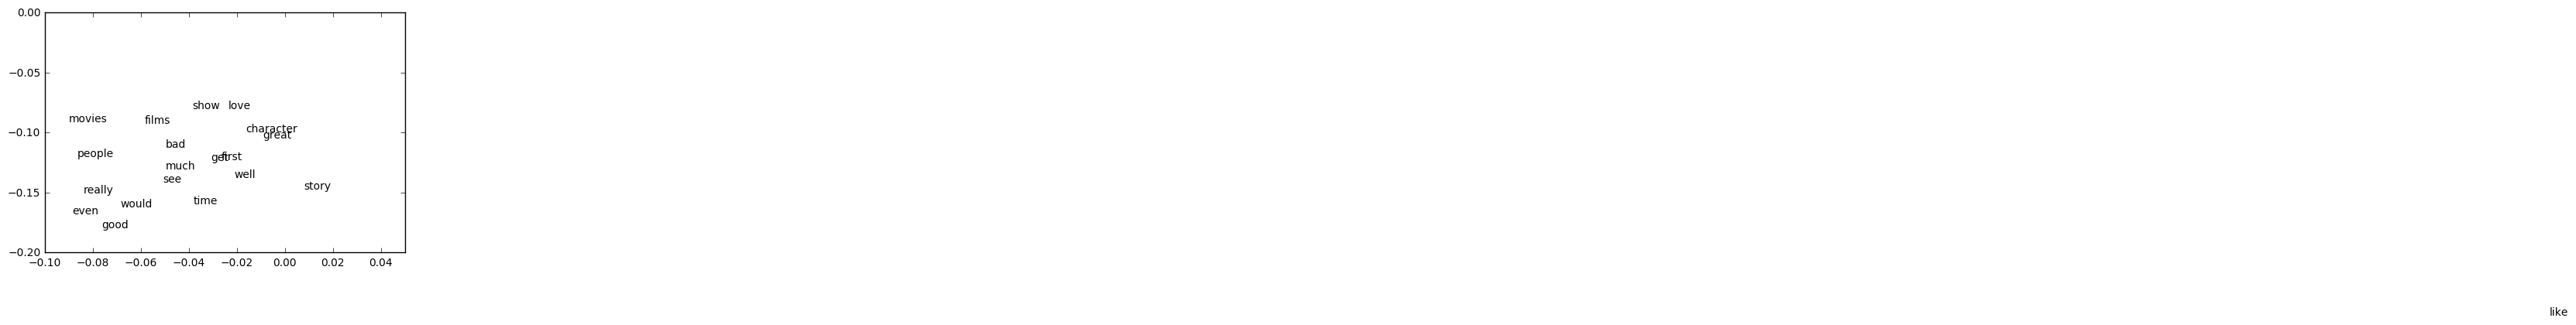

In [20]:
for i in top_words:
    plt.text(u[i][0], u[i][1], vectorizer.get_feature_names()[i])
plt.axis([-0.1, 0.05, -0.2, 0.0])
plt.show()